<a href="https://colab.research.google.com/github/RC0ndado/CIAACD/blob/main/DBAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive.mount("/content/gdrive")
!pwd

Mounted at /content/gdrive
/content


In [3]:
#put your own path in google drive
%cd "/content/gdrive/MyDrive/Equipo8/ConnectBD"
!ls

/content/gdrive/MyDrive/Equipo8/ConnectBD
'Copia de Untitled0.ipynb'   kaggle   kaggle_j.json   kaggle.json


In [25]:
!pip install kaggle

In [5]:
#Libraries
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
!chmod 600 kaggle.json

In [30]:
import shutil
shutil.copy('/content/gdrive/MyDrive/Equipo8/ConnectBD/content/kaggle.json', '/root/.kaggle/kaggle.json')

'/root/.kaggle/kaggle.json'

In [31]:
import kaggle

kaggle.api.authenticate()

In [33]:
!kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11284        450  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3395        133  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            718         29  1.0              
joebeachcapital/top-500-hollywood-m

In [34]:
# Download kaggle data of houses
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 17.4MB/s]


In [36]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [38]:
#Load datasets

df = pd.read_csv("/content/gdrive/MyDrive/Equipo8/ConnectBD/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
#Obtain datatypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [40]:
df.shape

(1460, 81)

In [46]:
import pandas as pd
import json

# Load CSV into a DataFrame
df = pd.read_csv("/content/gdrive/MyDrive/Equipo8/ConnectBD/content/train.csv")

# Analyze the columns of the DataFrame
data_analysis = {}
for column in df.columns:
    data_type = df[column].dtype
    if data_type in ["int64", "float64"]:
        classification = "numeric"
    else:
        classification = "categorical"

    # Convert numpy types to native Python types for JSON serialization
    example_value = df[column].iloc[0]
    if isinstance(example_value, (np.int64, np.float64, np.int32)):
        example_value = int(example_value)

    data_analysis[column] = {
        "data_type": str(data_type),
        "unique_values": int(df[column].nunique()),
        "missing_values": int(df[column].isnull().sum()),
        "example_value": example_value,
        "classification": classification
    }

# Convert analysis to JSON format
data_analysis_json = json.dumps(data_analysis, indent=4)

# Display column names
print("Column Names:")
print(df.columns.tolist())

# Provide a data example for each column in JSON format
data_example = df.iloc[0].astype(str).to_dict()  # Convert all values to string for JSON serialization
data_example_json = json.dumps(data_example, indent=4)

print("\nData Example in JSON Format:")
print(data_example_json)


Column Names:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolA

In [47]:
import numpy as np

# Analyze the columns of the DataFrame
data_analysis = {}
for column in df.columns:
    data_type = df[column].dtype
    if data_type in ["int64", "float64"]:
        classification = "numeric"
    else:
        classification = "categorical"

    # Convert numpy types to native Python types
    example_value = df[column].iloc[0]
    if isinstance(example_value, (np.int64, np.float64, np.int32)):
        example_value = int(example_value)

    data_analysis[column] = {
        "data_type": str(data_type),
        "unique_values": int(df[column].nunique()),
        "missing_values": int(df[column].isnull().sum()),
        "example_value": example_value,
        "classification": classification
    }

# Provide a data example for each column
data_example = df.iloc[0].astype(str).to_dict()

# Create a dictionary with the analysis and data example
analysis_dict = {
    "data_analysis": data_analysis,
    "data_example": data_example
}

analysis_dict

{'data_analysis': {'Id': {'data_type': 'int64',
   'unique_values': 1460,
   'missing_values': 0,
   'example_value': 1,
   'classification': 'numeric'},
  'MSSubClass': {'data_type': 'int64',
   'unique_values': 15,
   'missing_values': 0,
   'example_value': 60,
   'classification': 'numeric'},
  'MSZoning': {'data_type': 'object',
   'unique_values': 5,
   'missing_values': 0,
   'example_value': 'RL',
   'classification': 'categorical'},
  'LotFrontage': {'data_type': 'float64',
   'unique_values': 110,
   'missing_values': 259,
   'example_value': 65,
   'classification': 'numeric'},
  'LotArea': {'data_type': 'int64',
   'unique_values': 1073,
   'missing_values': 0,
   'example_value': 8450,
   'classification': 'numeric'},
  'Street': {'data_type': 'object',
   'unique_values': 2,
   'missing_values': 0,
   'example_value': 'Pave',
   'classification': 'categorical'},
  'Alley': {'data_type': 'object',
   'unique_values': 2,
   'missing_values': 1369,
   'example_value': nan,
 

This heatmap of the correlations between the variables of the DataFrame. The lighter shades represent strong positive correlations, while the darker shades represent strong negative correlations. Areas in neutral tones (around the central color) indicate a weak or non-existent correlation between the variables.

It is especially useful to observe how the other variables correlate with SalePrice (the last row/column) to determine which features have a more significant impact on the price.

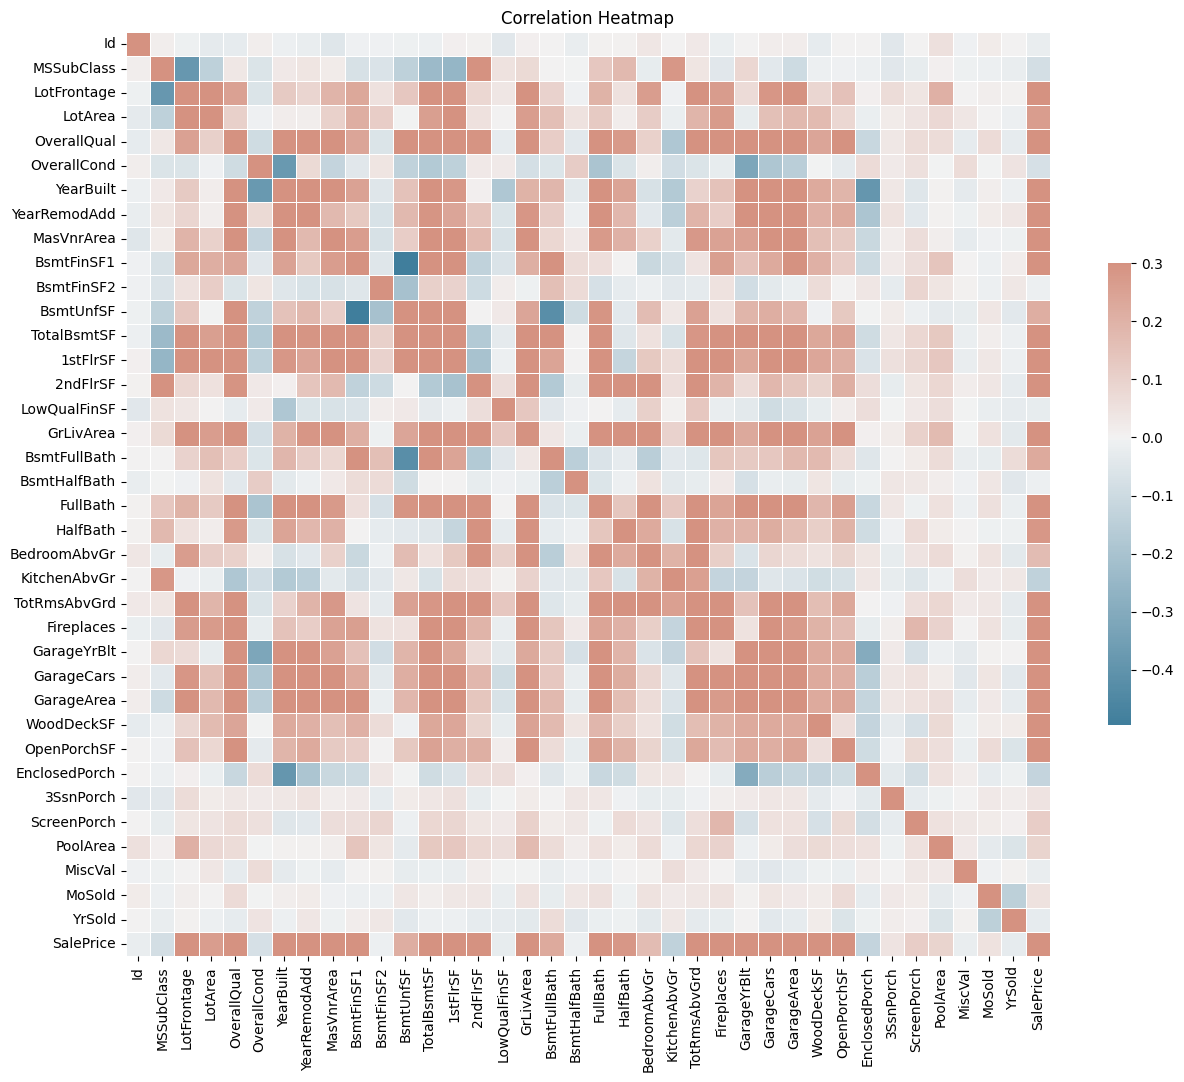

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap")
plt.show()